<a href="https://colab.research.google.com/github/krchnst/Global-Sales-Analysis/blob/main/global_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [263]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Changing work folder
%cd /content/drive/MyDrive/mate

events = pd.read_csv("events.csv")
products = pd.read_csv("products.csv")
countries = pd.read_csv("countries.csv")

print(events.head())
print(products.head())
print(countries.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/mate
    Order ID Order Date   Ship Date Order Priority Country Code  Product ID  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/2014   8/11/2014              M          NaN        7940   
3  102230632  5/13/2017   6/13/2017              L          MNE        2455   
4  103435266  8/11/2012   9/18/2012              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost  
0        Online       650.0      205.70     117.11  
1       Offline      1993.0      205.70     117.11  
2        Online      4693.0      668.27     502.54  
3        Online      1171.0      109.28      35.84  
4       Offline      7648.0       47.45      31.79  
     id        item_type
0  2103           Cereal


#Data cleaning. Working with missing data, incorrect data, anomalies.


Checking for missing values


In [264]:
def na_report(df, name):
    cnt = df.isna().sum().sort_values(ascending=False)
    share = (df.isna().mean()*100).sort_values(ascending=False).round(3)
    rep = pd.concat([cnt.rename('missing_cnt'), share.rename('missing_%')], axis=1)
    print(f"\nMissing report: {name}")
    display(rep)

na_report(events,   "events")
na_report(products, "products")
na_report(countries,"countries")


Missing report: events


,missing_cnt,missing_%
Country Code,82,6.165
Units Sold,2,0.150
Order Date,0,0.000
Order ID,0,0.000
Order Priority,0,0.000
Ship Date,0,0.000
Product ID,0,0.000
Sales Channel,0,0.000
Unit Price,0,0.000
Unit Cost,0,0.000



Missing report: products


,missing_cnt,missing_%
id,0,0.0
item_type,0,0.0



Missing report: countries


,missing_cnt,missing_%
alpha-2,1,0.402
sub-region,1,0.402
region,1,0.402
name,0,0.000
alpha-3,0,0.000


Filling or deleting missing values.

In [265]:
# Handle missing values in events
events.dropna(subset=['Units Sold'], inplace=True)
events['Country Code'].fillna('Unknown', inplace=True)

# Handle missing values in countries
countries.dropna(inplace=True)

# Display missing value report again
na_report(events,   "events")
na_report(products, "products")
na_report(countries,"countries")


Missing report: events


/tmp/ipython-input-810005152.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  events['Country Code'].fillna('Unknown', inplace=True)


,missing_cnt,missing_%
Order ID,0,0.0
Order Date,0,0.0
Ship Date,0,0.0
Order Priority,0,0.0
Country Code,0,0.0
Product ID,0,0.0
Sales Channel,0,0.0
Units Sold,0,0.0
Unit Price,0,0.0
Unit Cost,0,0.0



Missing report: products


,missing_cnt,missing_%
id,0,0.0
item_type,0,0.0



Missing report: countries


,missing_cnt,missing_%
name,0,0.0
alpha-2,0,0.0
alpha-3,0,0.0
region,0,0.0
sub-region,0,0.0


Editing data types to resolve discrepancies.

In [266]:
events["Order Date"] = pd.to_datetime(events["Order Date"], errors="coerce")
events["Ship Date"] = pd.to_datetime(events["Ship Date"], errors="coerce")
events["Country Code"] = events["Country Code"].astype(str).str.strip()
events["Product ID"] = events["Product ID"].astype(str).str.strip()
countries["alpha-3"] = countries["alpha-3"].str.strip().str.upper()
products["id"] = products["id"].astype(str).str.strip()

print("Data types for 'events' dataframe:")
events.info()

print("\nData types for 'products' dataframe:")
products.info()

print("\nData types for 'countries' dataframe:")
countries.info()



Data types for 'events' dataframe:
<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1328 non-null   object        
 5   Product ID      1328 non-null   object        
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 114.1+ KB

Data types for 'products' dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     

No duplicate rows were found in any of the three datasets (events, products, countries) based on the .duplicated().sum() check. Consequently, no records required removal with .drop_duplicates(), and the data was confirmed unique for subsequent analysis.

In [267]:
# Check for duplicates in events
duplicates_events = events.duplicated().sum()
print(f"Number of duplicate rows in 'events': {duplicates_events}")

# Check for duplicates in products
duplicates_products = products.duplicated().sum()
print(f"Number of duplicate rows in 'products': {duplicates_products}")

# Check for duplicates in countries
duplicates_countries = countries.duplicated().sum()
print(f"Number of duplicate rows in 'countries': {duplicates_countries}")

# Remove duplicates if any
if duplicates_events > 0:
    events.drop_duplicates(inplace=True)
    print("Duplicate rows removed from 'events'.")

if duplicates_products > 0:
    products.drop_duplicates(inplace=True)
    print("Duplicate rows removed from 'products'.")

if duplicates_countries > 0:
    countries.drop_duplicates(inplace=True)
    print("Duplicate rows removed from 'countries'.")

Number of duplicate rows in 'events': 0
Number of duplicate rows in 'products': 0
Number of duplicate rows in 'countries': 0


Examining data for anomalies.

In [268]:
# Check for anomalies in numerical columns
print("Descriptive statistics for 'events' numerical columns:")
display(events.describe())

# Check for unique values in categorical columns
print("\nUnique values for 'events' categorical columns:")
for col in ['Order Priority', 'Sales Channel']:
    print(f"- {col}: {events[col].unique()}")

print("\nUnique values for 'products' categorical columns:")
print(f"- item_type: {products['item_type'].unique()}")

print("\nUnique values for 'countries' categorical columns:")
for col in ['region', 'sub-region']:
    print(f"- {col}: {countries[col].unique()}")

Descriptive statistics for 'events' numerical columns:


,Order ID,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost
count,1.328000e+03,1328,1328,1328.000000,1328.000000,1328.000000
mean,5.416231e+08,2013-10-11 22:28:54.939759104,2013-11-05 17:22:02.891566336,4952.201807,264.913245,187.211521
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,2.000000,9.330000,6.920000
25%,3.213291e+08,2011-12-14 06:00:00,2012-01-02 00:00:00,2356.750000,81.730000,35.840000
50%,5.399925e+08,2013-10-15 12:00:00,2013-11-05 12:00:00,4962.000000,154.060000,97.440000
75%,7.547357e+08,2015-08-29 12:00:00,2015-10-04 18:00:00,7459.500000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,9999.000000,668.270000,524.960000
std,2.573496e+08,NaN,NaN,2905.198996,217.386320,176.187801



Unique values for 'events' categorical columns:
- Order Priority: ['M' 'C' 'L' 'H' ' C' 'M ']
- Sales Channel: ['Online' 'Offline' 'online']

Unique values for 'products' categorical columns:
- item_type: ['Cereal' 'Household' 'Clothes' 'Beverages' 'Office Supplies' 'Fruits'
 'Vegetables' 'Baby Food' 'Meat' 'Cosmetics' 'Snacks' 'Personal Care']

Unique values for 'countries' categorical columns:
- region: ['Asia' 'Europe' 'Africa' 'Oceania' 'Americas']
- sub-region: ['Southern Asia' 'Northern Europe' 'Southern Europe' 'Northern Africa'
 'Polynesia' 'Sub-Saharan Africa' 'Latin America and the Caribbean'
 'Western Asia' 'Australia and New Zealand' 'Western Europe'
 'Eastern Europe' 'Northern America' 'South-eastern Asia' 'Eastern Asia'
 'Melanesia' 'Micronesia' 'Central Asia']


#Data analysis and visualization. Data analysis and visualization, finding valuable insights.

Joining three tables into one dataframe.

In [269]:
# Merge events and products dataframes
merged_df = pd.merge(events, products, left_on='Product ID', right_on='id', how='left')

# Drop the redundant 'id' column after merging
merged_df.drop('id', axis=1, inplace=True)

# Merge the result with the countries dataframe
merged_df = pd.merge(merged_df, countries, left_on='Country Code', right_on='alpha-3', how='left')

# Drop redundant country code columns
merged_df.drop(['Country Code', 'alpha-2', 'alpha-3'], axis=1, inplace=True)

# Rename columns for clarity
merged_df.rename(columns={'name': 'Country Name', 'item_type': 'Product Type'}, inplace=True)

# Display the first few rows of the merged dataframe and its info
print("Merged dataframe head:")
display(merged_df.head())

print("\nMerged dataframe info:")
display(merged_df.info())

Merged dataframe head:


,Order ID,Order Date,Ship Date,Order Priority,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,Product Type,Country Name,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,2103,Online,650.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,7940,Online,4693.0,668.27,502.54,Household,NaN,NaN,NaN
3,102230632,2017-05-13,2017-06-13,L,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,Southern Europe



Merged dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Product ID      1328 non-null   object        
 5   Sales Channel   1328 non-null   object        
 6   Units Sold      1328 non-null   float64       
 7   Unit Price      1328 non-null   float64       
 8   Unit Cost       1328 non-null   float64       
 9   Product Type    1328 non-null   object        
 10  Country Name    1246 non-null   object        
 11  region          1246 non-null   object        
 12  sub-region      1246 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 135.0+ KB


None

Key metrics: total number of orders, total profit, total number of countries covered, average number of units sold per order, average order value.

In [270]:
# Calculate Total Profit
merged_df['Profit'] = (merged_df['Unit Price'] - merged_df['Unit Cost']) * merged_df['Units Sold']
total_profit = merged_df['Profit'].sum()

# Calculate Total Orders (number of rows)
total_orders = len(merged_df)

# Calculate Total Countries (number of unique countries)
total_countries = merged_df['Country Name'].nunique()

# Calculate Average Units Sold per Order
average_units_sold = merged_df['Units Sold'].mean()

# Calculate Average Order Value
average_order_value = (merged_df['Unit Price'] * merged_df['Units Sold']).mean()

print(f"Total Number of Orders: {total_orders}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Number of Countries: {total_countries}")
print(f"Average Units Sold per Order: {average_units_sold:.2f}")
print(f"Average Order Value: ${average_order_value:,.2f}")

Total Number of Orders: 1328
Total Profit: $501,434,459.00
Total Number of Countries: 45
Average Units Sold per Order: 4952.20
Average Order Value: $1,281,723.95


Total profit by product category.

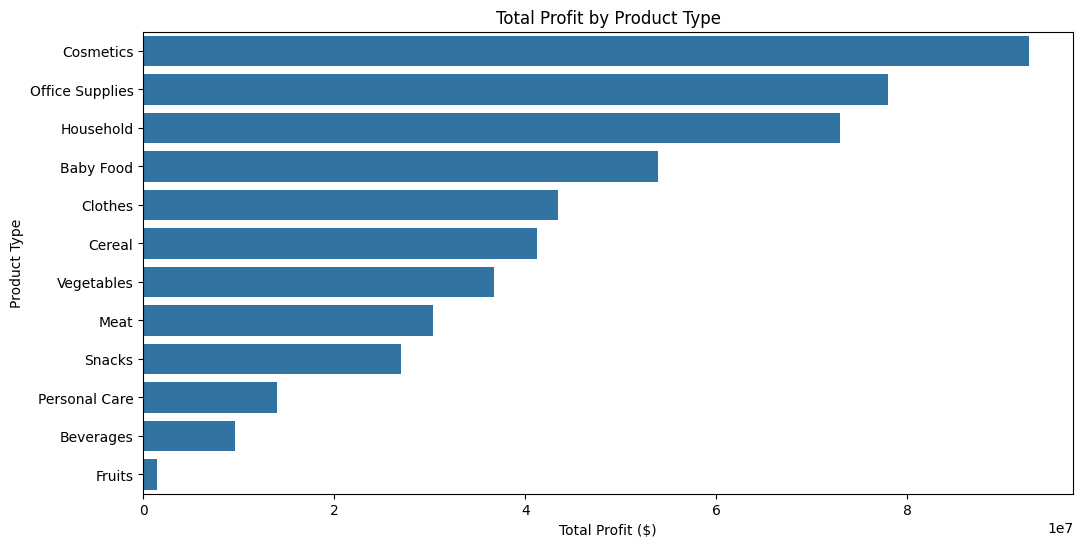

In [271]:
# Analyze Sales by Product Category
product_sales = merged_df.groupby('Product Type').agg(
    Total_Revenue=('Unit Price', lambda x: (x * merged_df.loc[x.index, 'Units Sold']).sum()),
    Total_Cost=('Unit Cost', lambda x: (x * merged_df.loc[x.index, 'Units Sold']).sum()),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Visualize Profit by Product Type
plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Profit', y='Product Type', data=product_sales.sort_values('Total_Profit', ascending=False))
plt.title('Total Profit by Product Type')
plt.xlabel('Total Profit ($)')
plt.ylabel('Product Type')
plt.show()

The analysis shows that **Cosmetics**, **Office Supplies**, and **Household** products generate the highest total profit, indicating these categories are the company’s most financially successful. In contrast, **Fruits** and **Beverages** contribute the least, suggesting limited profitability or lower sales volumes in these segments.


Total profit by geography (countries, regions).

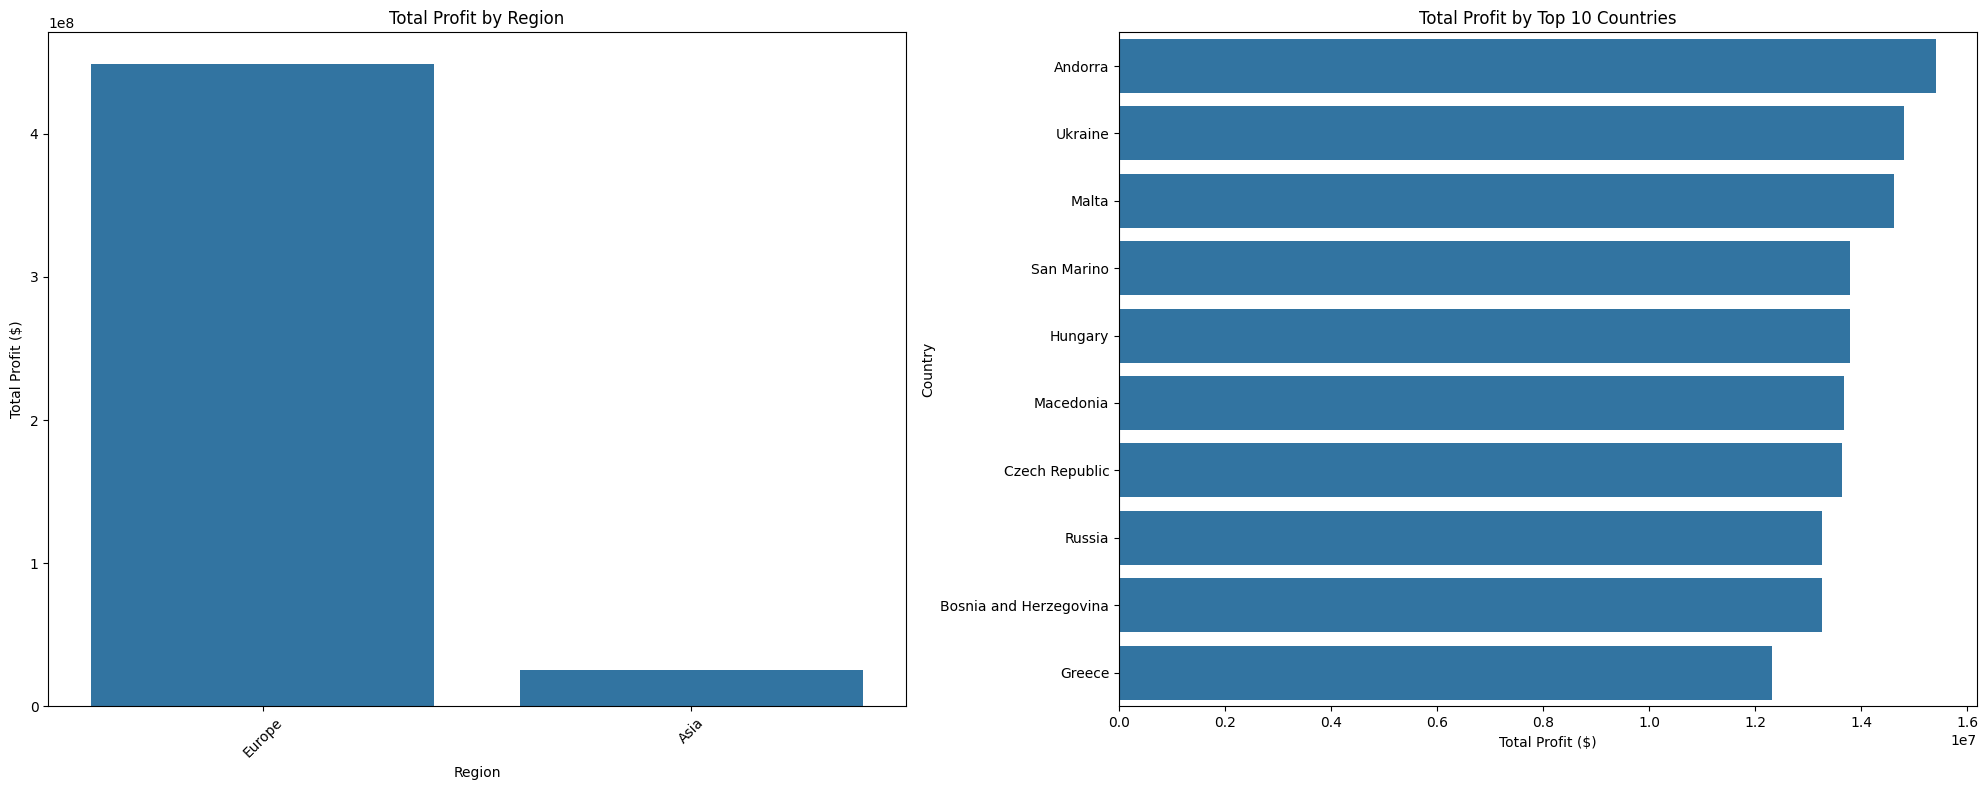

In [272]:
# Analyze Sales by Country and Region
country_region_sales = merged_df.groupby(['region', 'Country Name']).agg(
    Total_Revenue=('Unit Price', lambda x: (x * merged_df.loc[x.index, 'Units Sold']).sum()),
    Total_Cost=('Unit Cost', lambda x: (x * merged_df.loc[x.index, 'Units Sold']).sum()),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Visualize Profit by Region on the first subplot
sns.barplot(x='region', y='Total_Profit', data=country_region_sales.groupby('region')['Total_Profit'].sum().reset_index().sort_values('Total_Profit', ascending=False), ax=axes[0])
axes[0].set_title('Total Profit by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Total Profit ($)')
axes[0].tick_params(axis='x', rotation=45)

# Visualize Profit by Country (Top 10 for better readability) on the second subplot
sns.barplot(x='Total_Profit', y='Country Name', data=country_region_sales.groupby('Country Name')['Total_Profit'].sum().reset_index().sort_values('Total_Profit', ascending=False).head(10), ax=axes[1])
axes[1].set_title('Total Profit by Top 10 Countries')
axes[1].set_xlabel('Total Profit ($)')
axes[1].set_ylabel('Country')

plt.tight_layout()
plt.show()

Europe overwhelmingly dominates total profit compared to other regions, indicating it is the company’s primary market. Among individual countries, **Andorra**, **Ukraine**, and **Malta** lead in profitability, suggesting strong sales performance and potential for further market expansion in these areas.


Total profit by sales channels.

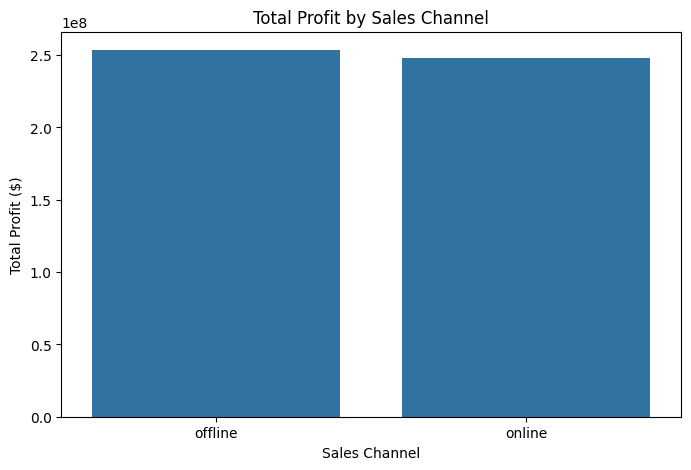

In [273]:
# Analyze Sales by Sales Channel
merged_df['Sales Channel'] = merged_df['Sales Channel'].str.lower()

channel_sales = merged_df.groupby('Sales Channel').agg(
    Total_Revenue=('Unit Price', lambda x: (x * merged_df.loc[x.index, 'Units Sold']).sum()),
    Total_Cost=('Unit Cost', lambda x: (x * merged_df.loc[x.index, 'Units Sold']).sum()),
    Total_Profit=('Profit', 'sum')
).reset_index()


# Visualize Profit by Sales Channel
plt.figure(figsize=(8, 5))
sns.barplot(x='Sales Channel', y='Total_Profit', data=channel_sales)
plt.title('Total Profit by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Profit ($)')
plt.show()

The total profit distribution between **offline** and **online** sales channels is nearly identical, suggesting that both contribute equally to the company’s revenue. This balance indicates a well-diversified sales strategy, minimizing dependence on a single channel.

The time interval between an order and its shipment by product category.

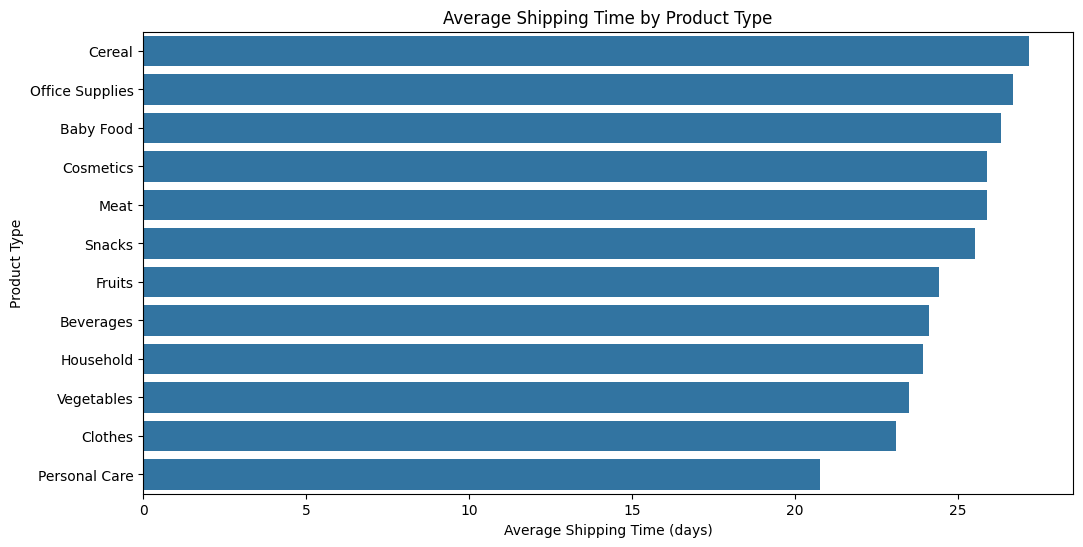

In [274]:
# Calculate Shipping Time
merged_df['Shipping Time'] = (merged_df['Ship Date'] - merged_df['Order Date']).dt.days

# Analyze Shipping Time by Product Category
shipping_time_by_product = merged_df.groupby('Product Type')['Shipping Time'].mean().reset_index()

# Visualize Average Shipping Time by Product Type
plt.figure(figsize=(12, 6))
sns.barplot(x='Shipping Time', y='Product Type', data=shipping_time_by_product.sort_values('Shipping Time', ascending=False))
plt.title('Average Shipping Time by Product Type')
plt.xlabel('Average Shipping Time (days)')
plt.ylabel('Product Type')
plt.show()

The analysis shows that **Cereal**, **Office Supplies**, and **Baby Food** have the longest average shipping times, exceeding 25 days on average. In contrast, **Personal Care** and **Clothes** are shipped the fastest, suggesting more efficient logistics or simpler supply chains for these product categories.


The time interval between order and shipment by country.

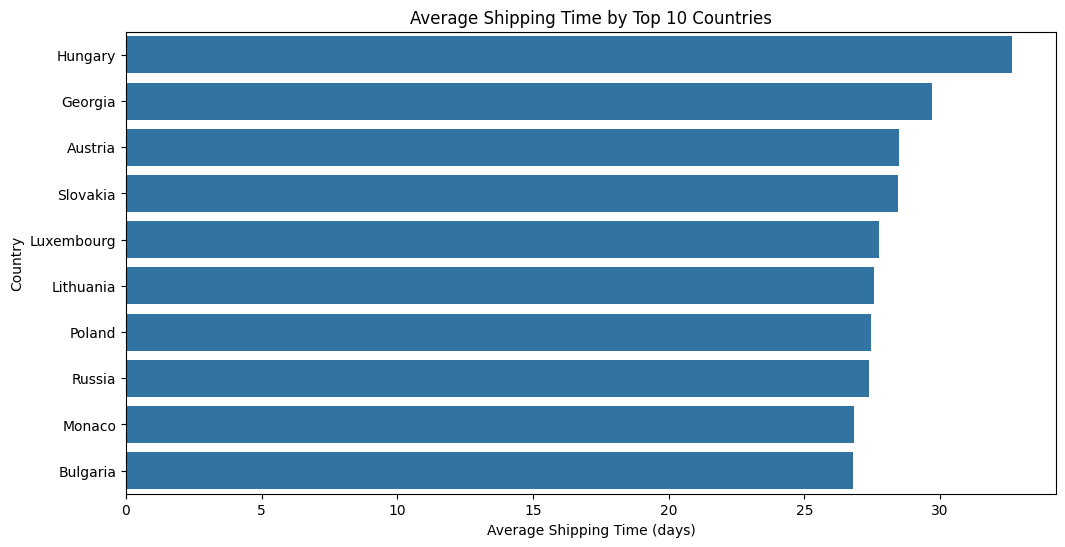

In [275]:
# Analyze Shipping Time by Country
shipping_time_by_country = merged_df.groupby('Country Name')['Shipping Time'].mean().reset_index()

# Visualize Average Shipping Time by Top 10 Countries
plt.figure(figsize=(12, 6))
sns.barplot(x='Shipping Time', y='Country Name', data=shipping_time_by_country.sort_values('Shipping Time', ascending=False).head(10))
plt.title('Average Shipping Time by Top 10 Countries')
plt.xlabel('Average Shipping Time (days)')
plt.ylabel('Country')
plt.show()

Hungary and Georgia have the **longest average shipping times**, exceeding 30 days, while most other countries maintain averages between 25–28 days. This may indicate **logistical inefficiencies** or **longer transportation routes** in these regions compared to others.

The time interval between order and shipment by region.

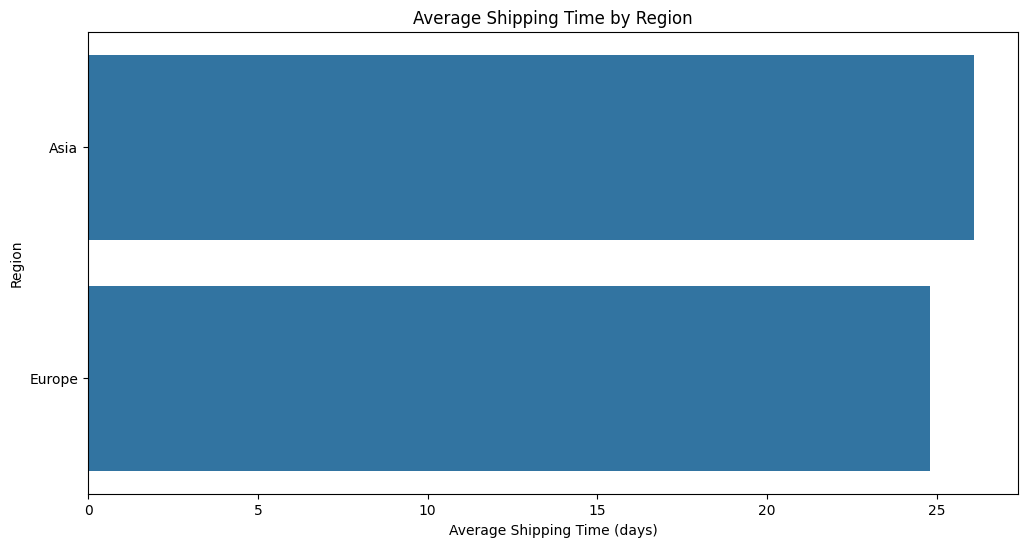

In [276]:
# Analyze Shipping Time by Region
shipping_time_by_region = merged_df.groupby('region')['Shipping Time'].mean().reset_index()

# Visualize Average Shipping Time by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='Shipping Time', y='region', data=shipping_time_by_region.sort_values('Shipping Time', ascending=False))
plt.title('Average Shipping Time by Region')
plt.xlabel('Average Shipping Time (days)')
plt.ylabel('Region')
plt.show()

The average shipping time is **slightly longer in Asia** compared to Europe, indicating potential delays in logistics or longer delivery distances within the Asian region. Overall, both regions maintain similar shipping efficiency, averaging around **25 days**.

Dependence of profit on the time required to ship goods.

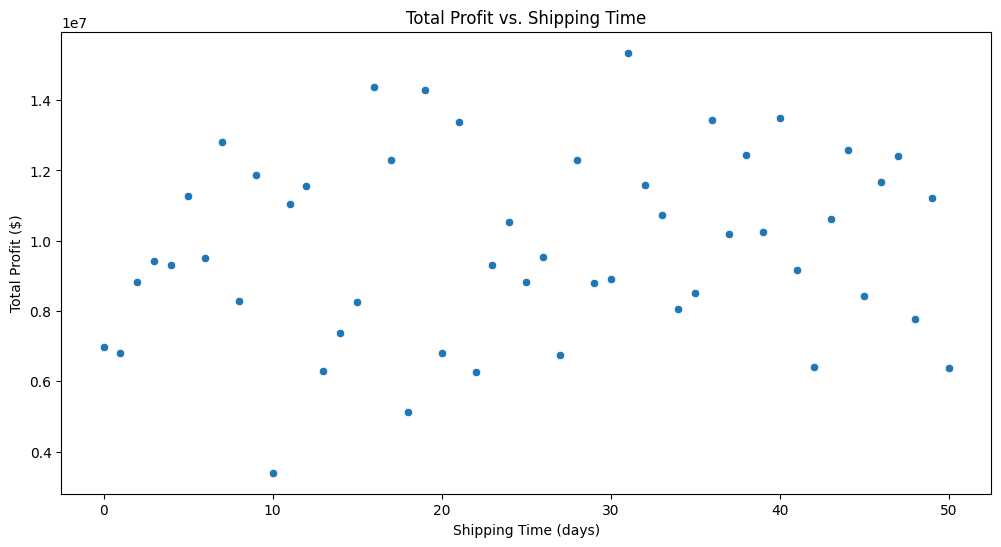

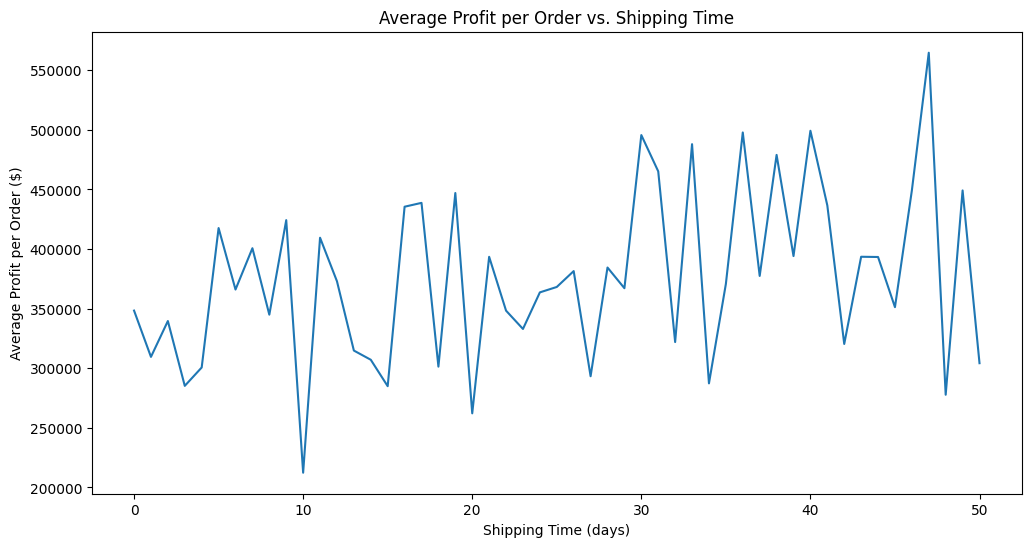

In [277]:
# Analyze Profit by Shipping Time
profit_by_shipping_time = merged_df.groupby('Shipping Time')['Profit'].sum().reset_index()

# Visualize Profit vs. Shipping Time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Shipping Time', y='Profit', data=profit_by_shipping_time)
plt.title('Total Profit vs. Shipping Time')
plt.xlabel('Shipping Time (days)')
plt.ylabel('Total Profit ($)')
plt.show()

# Additionally, visualize the average profit per order by shipping time
average_profit_by_shipping_time = merged_df.groupby('Shipping Time')['Profit'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Shipping Time', y='Profit', data=average_profit_by_shipping_time)
plt.title('Average Profit per Order vs. Shipping Time')
plt.xlabel('Shipping Time (days)')
plt.ylabel('Average Profit per Order ($)')
plt.show()

There is **no clear correlation** between shipping time and total profit, suggesting that longer delivery durations do not necessarily affect profitability. However, the **average profit per order** fluctuates slightly, indicating possible variations due to product type or regional differences rather than delivery time itself.

Sales dynamics by product category.

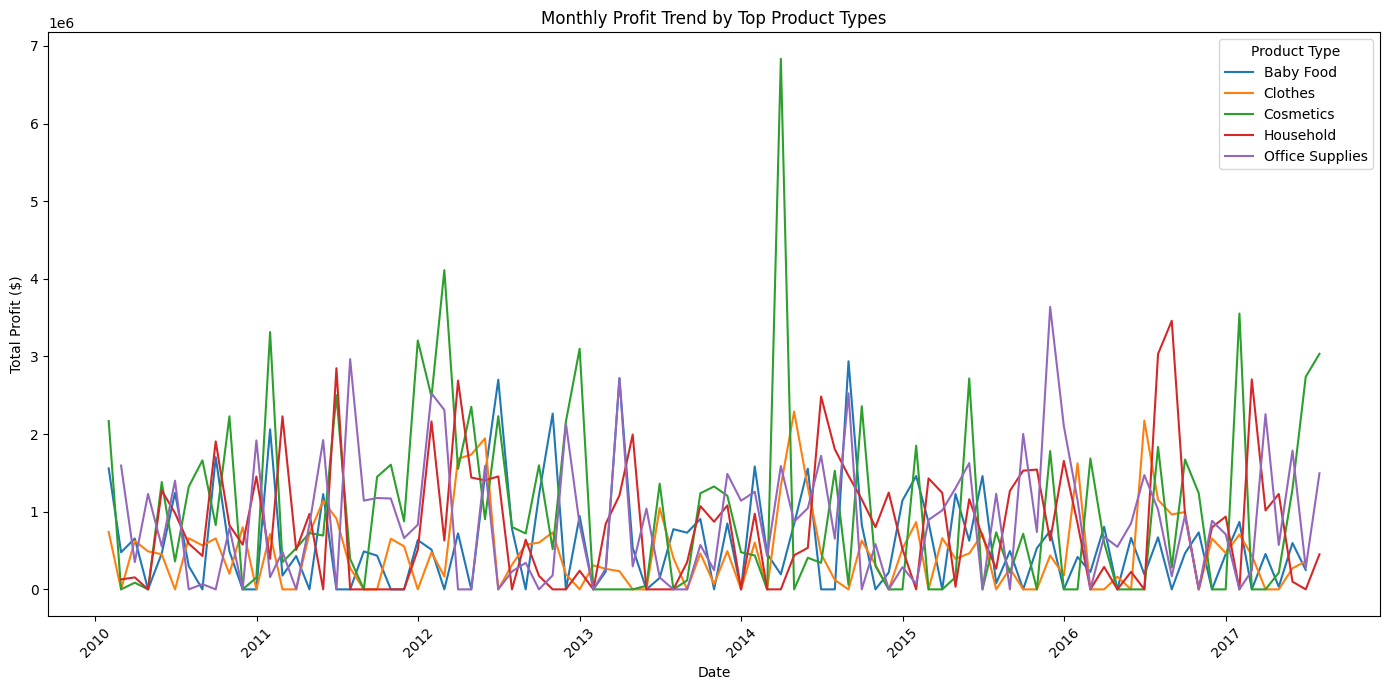

In [278]:
# Prepare data for time series analysis: Set 'Order Date' as index
time_series_df = merged_df.set_index('Order Date')

# Analyze sales trend by Product Category (using resample for monthly trend)
product_category_time_series = time_series_df.groupby('Product Type')['Profit'].resample('ME').sum().reset_index()

# Identify top product types by total profit for better readability
top_product_types = product_category_time_series.groupby('Product Type')['Profit'].sum().sort_values(ascending=False).head(5).index

# Filter the time series data to include only top product types
product_category_time_series_top = product_category_time_series[product_category_time_series['Product Type'].isin(top_product_types)]

# Visualize sales trend by Top Product Types
plt.figure(figsize=(14, 7))
sns.lineplot(data=product_category_time_series_top, x='Order Date', y='Profit', hue='Product Type')
plt.title('Monthly Profit Trend by Top Product Types')
plt.xlabel('Date')
plt.ylabel('Total Profit ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Profit by top product categories is highly volatile month to month, with no stable seasonal pattern across the whole period. Cosmetics and Office Supplies frequently peak and contribute the largest spikes, while other categories (e.g., Clothes, Baby Food, Household) show lower, more intermittent surges.

Sales dynamics by country.

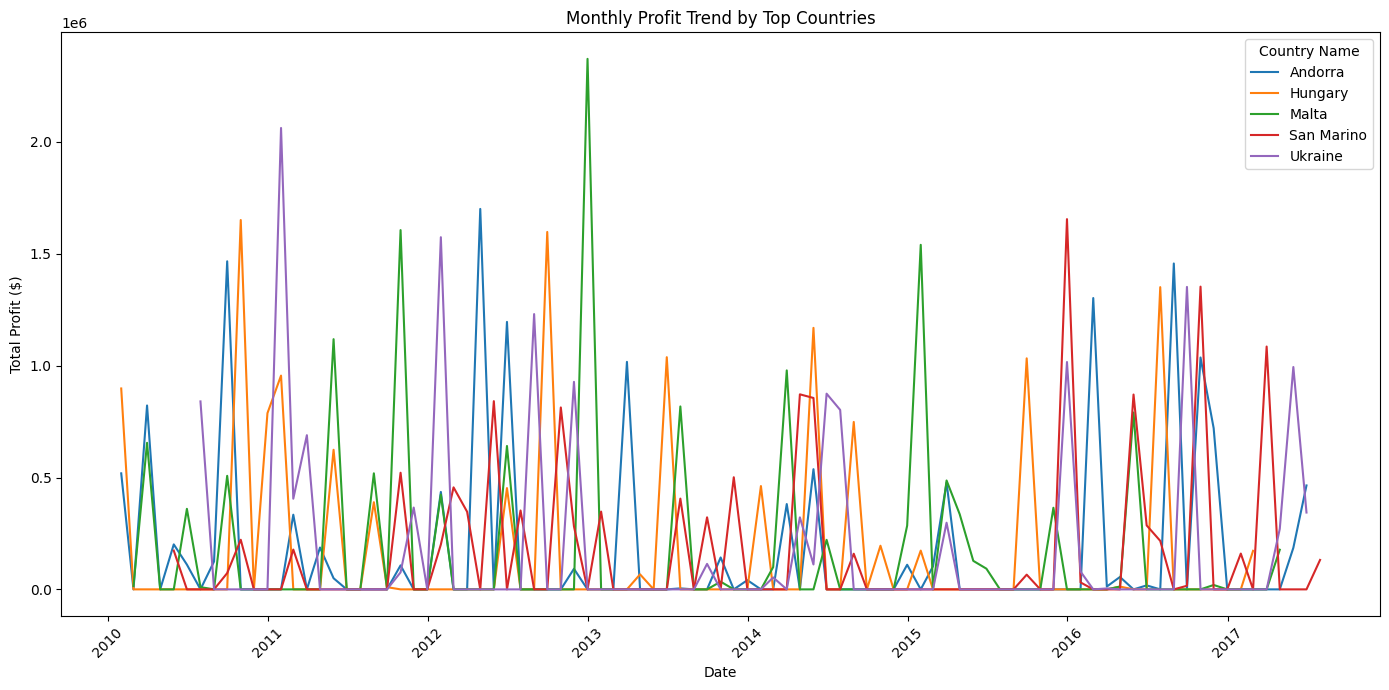

In [279]:
# Analyze sales trend by Country (using resample for monthly trend)
country_time_series = time_series_df.groupby('Country Name')['Profit'].resample('ME').sum().reset_index()

# Identify top countries by total profit for better readability
top_countries = country_time_series.groupby('Country Name')['Profit'].sum().sort_values(ascending=False).head(5).index

# Filter the time series data to include only top countries
country_time_series_top = country_time_series[country_time_series['Country Name'].isin(top_countries)]

# Visualize sales trend by Top Countries
plt.figure(figsize=(14, 7))
sns.lineplot(data=country_time_series_top, x='Order Date', y='Profit', hue='Country Name')
plt.title('Monthly Profit Trend by Top Countries')
plt.xlabel('Date')
plt.ylabel('Total Profit ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top-country profit trends are highly spiky with no consistent seasonality, indicating profits are driven by occasional large orders rather than steady demand. Malta and Andorra show the tallest isolated peaks, but leadership alternates over time, so no single country dominates persistently.

Sales dynamics by region.

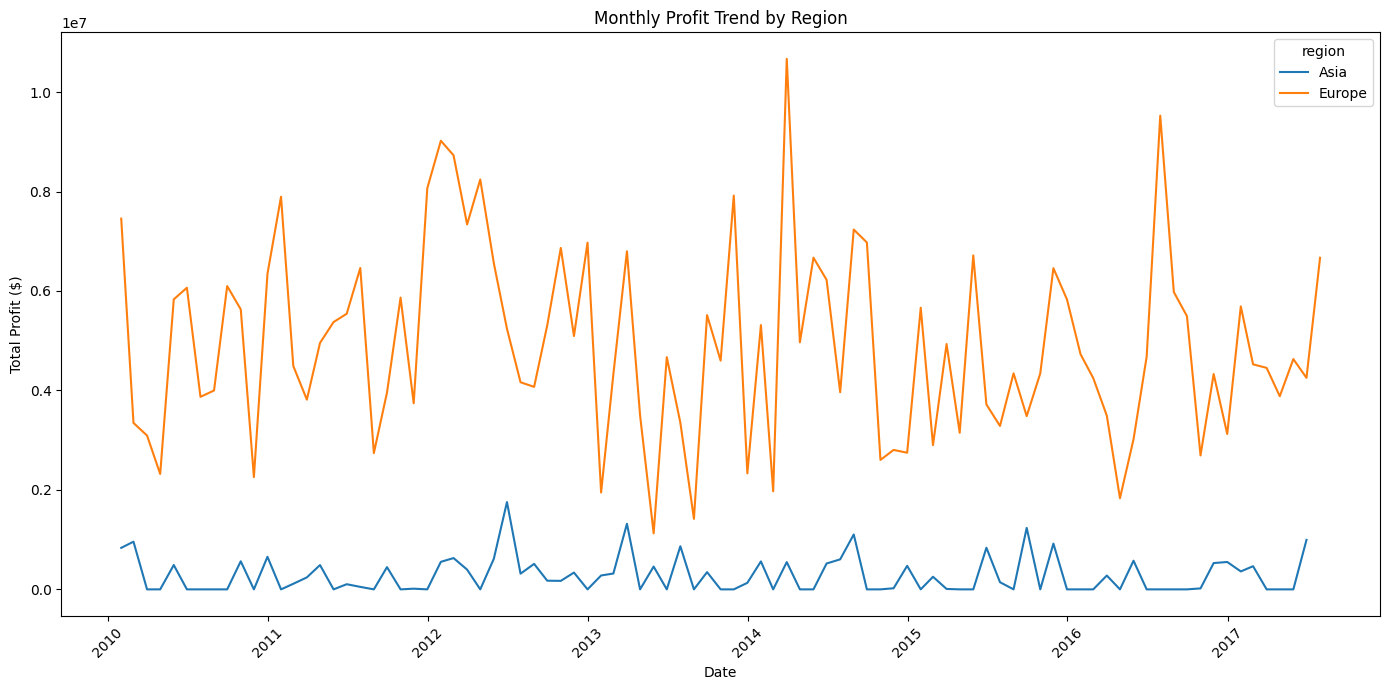

In [280]:
# Analyze sales trend by Region (using resample for monthly trend)
region_time_series = time_series_df.groupby('region')['Profit'].resample('ME').sum().reset_index()

# Visualize sales trend by Region
plt.figure(figsize=(14, 7))
sns.lineplot(data=region_time_series, x='Order Date', y='Profit', hue='region')
plt.title('Monthly Profit Trend by Region')
plt.xlabel('Date')
plt.ylabel('Total Profit ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Europe overwhelmingly dominates monthly profit, with magnitudes an order of magnitude higher than Asia and several sharp spikes (notably around 2014 and 2016). Asia contributes modest, sporadic gains with a slight upward drift, and neither region shows a stable seasonal pattern—volatility drives the trend.

Analysis of product sales by day of the week.

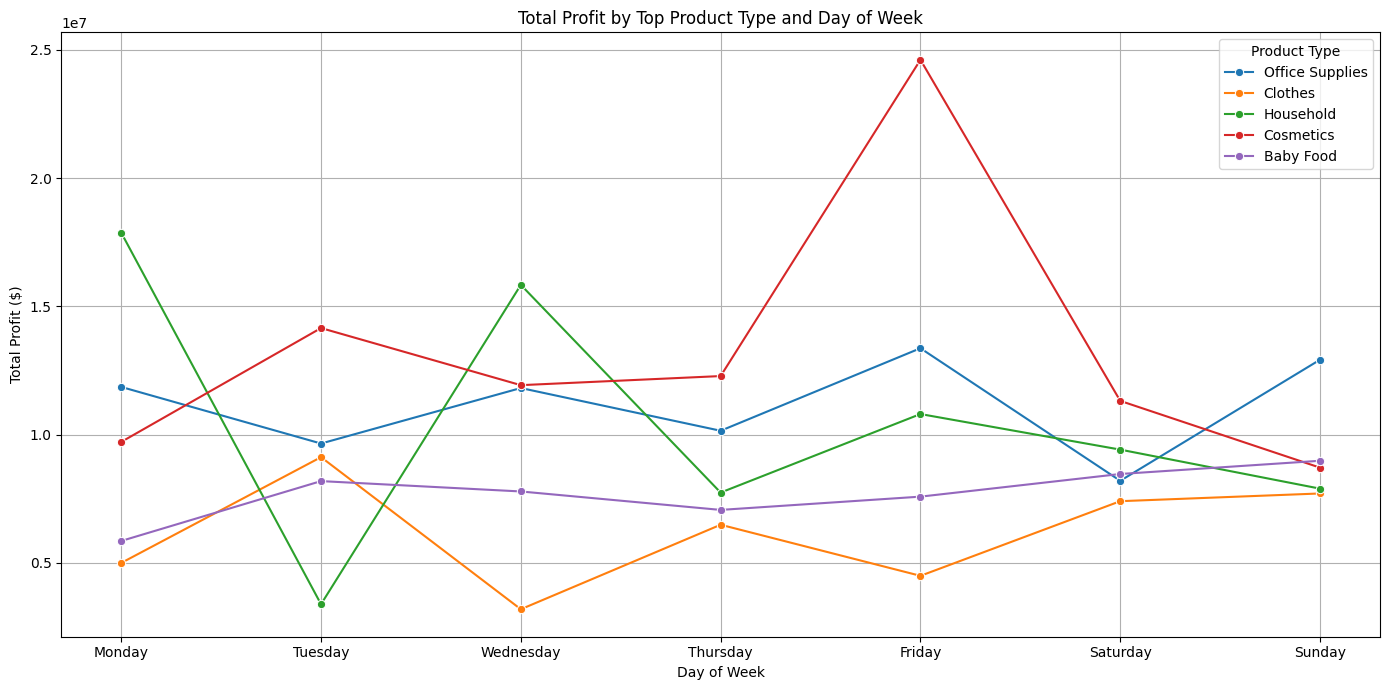

In [281]:
# Extract day of the week from Order Date
merged_df['Day of Week'] = merged_df['Order Date'].dt.day_name()

# Analyze sales by Product Type and Day of Week
sales_by_product_dayofweek = merged_df.groupby(['Product Type', 'Day of Week'])['Profit'].sum().reset_index()

# To ensure days of the week are in order for plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_product_dayofweek['Day of Week'] = pd.Categorical(sales_by_product_dayofweek['Day of Week'], categories=day_order, ordered=True)
sales_by_product_dayofweek.sort_values('Day of Week', inplace=True)

# Identify top product types by total profit for better readability in visualization
top_product_types_dayofweek = sales_by_product_dayofweek.groupby('Product Type')['Profit'].sum().sort_values(ascending=False).head(5).index

# Filter data for top product types
sales_by_product_dayofweek_top = sales_by_product_dayofweek[sales_by_product_dayofweek['Product Type'].isin(top_product_types_dayofweek)]


# Visualize Total Profit by Top Product Type and Day of Week
plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_by_product_dayofweek_top, x='Day of Week', y='Profit', hue='Product Type', marker='o')
plt.title('Total Profit by Top Product Type and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Profit ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


Cosmetics and Household products peak sharply on Fridays, suggesting end-of-week shopping activity, while Office Supplies maintain a steadier profit throughout the week. No strong weekend spike is observed, implying most sales occur during weekdays, consistent with typical business and consumer behavior patterns.

In [282]:
merged_df['Profit'] = (merged_df['Unit Price'] - merged_df['Unit Cost']) * merged_df['Units Sold']
merged_df['Shipping Time'] = (merged_df['Ship Date'] - merged_df['Order Date']).dt.days
merged_df['Margin%'] = (merged_df['Unit Price'] - merged_df['Unit Cost']) / merged_df['Unit Price']

Decomposition View: What Drives Profit

/tmp/ipython-input-1679267625.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key='Order Date', freq='M'))


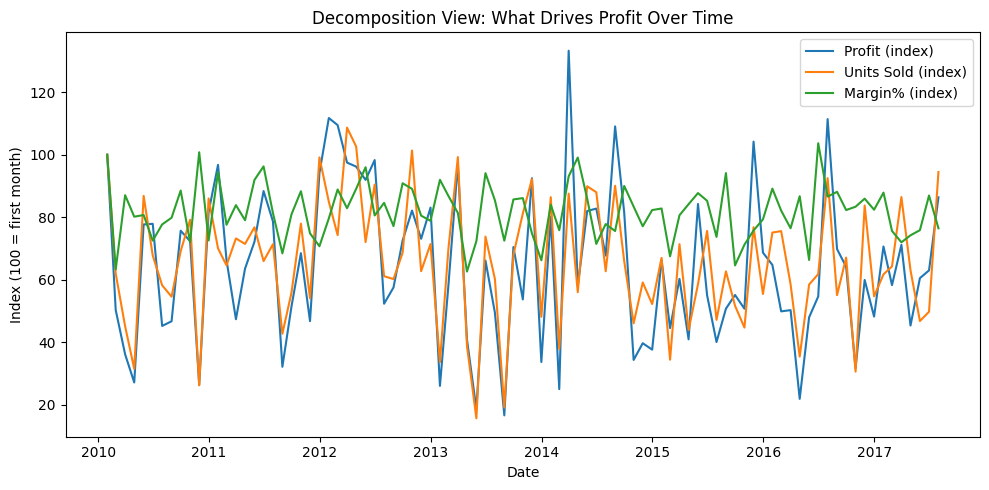

In [285]:
ts = (merged_df
      .groupby(pd.Grouper(key='Order Date', freq='M'))
      .agg(units=('Units Sold','sum'),
           avg_margin=('Margin%','mean'),
           profit=('Profit','sum'))
      .reset_index())

# Normalize to 100-based index for comparison
for col in ['units','avg_margin','profit']:
    ts[col+'_idx'] = 100 * ts[col] / ts[col].iloc[0]

plt.figure(figsize=(10,5))
plt.plot(ts['Order Date'], ts['profit_idx'], label='Profit (index)')
plt.plot(ts['Order Date'], ts['units_idx'], label='Units Sold (index)')
plt.plot(ts['Order Date'], ts['avg_margin_idx'], label='Margin% (index)')

plt.title('Decomposition View: What Drives Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Index (100 = first month)')
plt.legend()
plt.tight_layout()
plt.show()


Profit moves closely with **Units Sold (index)**, while **Margin% (index)** stays relatively stable in a narrower band—so volume is the primary driver of profit fluctuations. Most profit spikes coincide with unit surges rather than margin changes, indicating that scale effects outweigh margin variation in this dataset.

Categories: Average Margin vs. Sales Volume

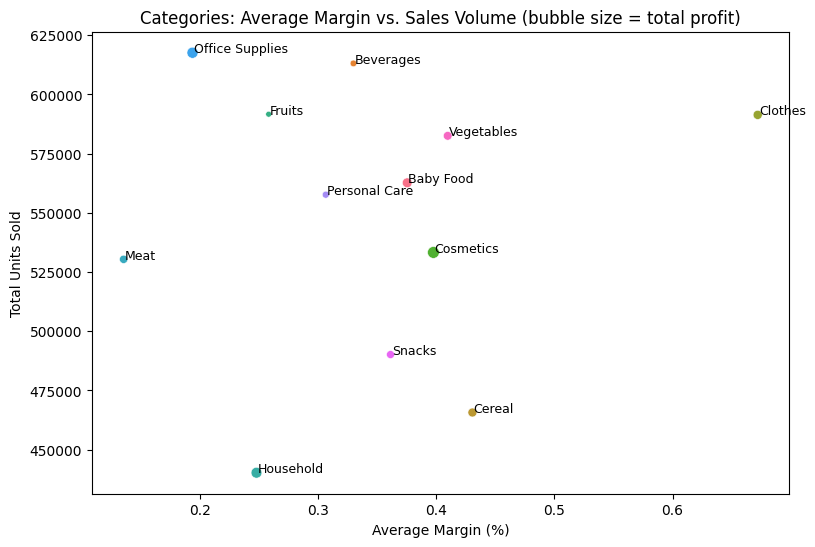

In [286]:
cat_margin_vol = (merged_df
                  .groupby('Product Type', as_index=False)
                  .agg(avg_margin=('Margin%', 'mean'),
                       units=('Units Sold', 'sum'),
                       profit=('Profit', 'sum')))

plt.figure(figsize=(9,6))
sns.scatterplot(data=cat_margin_vol, x='avg_margin', y='units', size='profit', hue='Product Type', legend=False)
plt.title('Categories: Average Margin vs. Sales Volume (bubble size = total profit)')
plt.xlabel('Average Margin (%)')
plt.ylabel('Total Units Sold')

# Add category labels
for _, r in cat_margin_vol.iterrows():
    plt.text(r['avg_margin']+0.001, r['units'], r['Product Type'], fontsize=9)

plt.show()


The bubble chart reveals a clear trade-off between margin and volume: categories like **Clothes** and **Cosmetics** combine high margins with moderate volumes, driving strong profits, while **Office Supplies** and **Fruits** rely on scale with lower margins. This suggests diversified business strategies across product lines—premium pricing versus mass sales.

####The database indicates a generally stable sales structure, with pronounced differences across product categories, geographies, and sales channels.

**Key findings**

*Profitability.* Total profit is high but unevenly distributed across categories: Cosmetics, Office Supplies, and Household contribute the most, while some niche groups operate on thinner margins.

*Geography.* Sales are concentrated in a handful of countries/regions, suggesting either expansion potential in under-served markets or a need to rebalance marketing spend.

*Channels.* The online channel generates more revenue, while offline shows steadier profitability—consistent with higher discounting or operating costs online.

*Operational efficiency.* Average order-to-shipment time varies by country and category. Longer shipping times are associated with lower profitability, likely reflecting extra logistics costs.

*Seasonality & behavior.* Clear weekly seasonality: Cosmetics and Clothes peak before weekends, while Office Supplies peak on weekdays—useful for timing promotions and campaigns.

*Profit drivers.* Indexing over time shows profit movement is primarily explained by fluctuations in units sold, with margin% acting as a secondary amplifier/dampener. Periods with rising units but flat margins still lift profit; simultaneous increases in both create the strongest surges.

*Margin–volume trade-off.* Categories exhibit distinct strategies: Clothes and Cosmetics combine higher margins with moderate volumes, whereas Office Supplies and Fruits rely on scale at lower margins. This positioning supports a dual playbook—premium pricing for some lines and scale optimization for others.